# Data-driven Approach to CFP - Mining PyData Conferences

Data-driven approach is good in the most cases. Most of us have seen people use this approach for some of the business decisions, or something you will care much more than a minor daily decision, but what if your toolkit is so fast and powerful that you can use it easily even for daily tasks.

In this article, I'm going to explain one of such use-cases, and introduce you one of the tools I use for some of my tasks. 

So starting with the problem: I was interested to visit a conference, in my case it was one of the local PyData conferences. If you visit a conference you most likely focus on content, so I wanted to have an analysis of the content of the conference. From another side, I was also interested to see, how the focus of the conference was changing over the time and for the very last point, try to find out would it be the kind of conference where I can share my knowledge and experience of using python for data-related tasks.

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://pydata.org/nyc2014/schedule/" width=100% height=350></iframe>')

In [2]:
from bs4 import BeautifulSoup
import urllib2

# past events
# TODO: fetch this data from past events page
conferences = ['nyc2014', 'berlin2014', 'sv2014', 'ldn2014', 'nyc2013']

abstract_url = "http://pydata.org/%s/abstracts/"

conf_data = {}

# Collecting data about abstracts
for conference in conferences:
    print "loading data for %s conference" % conference
    raw = urllib2.urlopen(abstract_url % conference).read()
    soup = BeautifulSoup(raw)
    abstracts = [abstract.get_text().strip() for abstract in soup.find_all(class_="accordion-inner")]
    titles = [title.get_text().strip() for title in soup.find_all(class_="accordion-toggle")]
#     speakers = [speaker.get_text().strip() for speaker in soup.select(".accordion-heading h5 a")]
    
    conf_data[conference] = {}
    conf_data[conference]['abstracts'] = abstracts
    conf_data[conference]['titles'] = titles
#     conf_data[conference]['speakers'] = speakers

loading data for nyc2014 conference
loading data for berlin2014 conference
loading data for sv2014 conference
loading data for ldn2014 conference
loading data for nyc2013 conference


In [3]:
conf_data['nyc2014']['titles'][:20]

[u'(Easy), High Performance Text Processing with Rosetta',
 u'A Machine Learning Pipeline with Scikit-Learn',
 u'Advanced IPython Notebook Widgets',
 u'Advanced scikit-learn',
 u'Analyzing Satellite Images With Python Scientific Stack',
 u'Beautiful Interactive Visualizations in the Browser with Bokeh',
 u'Biological Data Science',
 u'Blaze Foundations: Part 1',
 u'Data Community/Meetup Organizers',
 u"Data Science: It's Easy as Py\u01c3",
 u'Data warehouse and conceptual modelling with Cubes 1.0',
 u'Data-driven conversations about biology',
 u'Decreasing Uncertainty with Weakly Informative Priors and Penalized Regression',
 u'Disco: Distributed Multi-Stage Data Pipelines',
 u'Driving Blaze in the Real World of Data Land Mines',
 u'Evaluating skills in educational and other settings: An overview',
 u'From DataFrame to Web Application in 10 minutes',
 u'Get To Know Your Data',
 u'Grids, Streets & Pipelines: Making a linguistic streetmap with scikit-learn',
 u'Healthcare Analytics']

### I use Python Pandas to structure all parsed data into dataframes

In [4]:
import pandas as pd

pydata = pd.DataFrame()

for conf in conf_data:
    conf_dataframe = pd.DataFrame.from_dict(conf_data[conf])
    conf_dataframe['conference'] = conf
    conf_dataframe['city'] = conf[:-4]
    conf_dataframe['year'] = int(conf[-4:])
    
    print pd.DataFrame.head(conf_dataframe)
    
    pydata = pydata.append(conf_dataframe)
    

                                           abstracts  \
0                                                      
1  The The Greater Plains Collaborative (GPC) is ...   
2  To a lot of people, Facebook is a website for ...   
3  The ad targeting team at Yelp is tasked with p...   
4                                                      

                                              titles conference city  year  
0                                                        sv2014   sv  2014  
1  Using Python and Paver to Control a Large Medi...     sv2014   sv  2014  
2  A Full Stack Approach to Data Visualization: T...     sv2014   sv  2014  
3                               Ad Targeting at Yelp     sv2014   sv  2014  
4  Analyzing Satellite Images With Python Scienti...     sv2014   sv  2014  
                                           abstracts  \
0  The Python data ecosystem has grown beyond the...   
1  In this talk I will give an overview of Random...   
2  Clustering data is a fundament

### Interesting to see how many talks we had from year to year, also that's another point to check that data looks close to what we expect

In [5]:
print 'records in dataframe %i' % len(pydata)
pydata.groupby(['conference']).count(1).sort('year', ascending=False)

records in dataframe 233


,abstracts,titles,city,year
conference,,,,
berlin2014,50,50,50,50
nyc2014,50,50,50,50
sv2014,49,49,49,49
ldn2014,44,44,44,44
nyc2013,40,40,40,40


**Seems like number of talks is slowly growing from 40 during nyc2013 and up to 50 during the last pydata of 2014**

## Now we have all the data. Let's try to analyse it ##








### So what size of proposal do they usually have?

In [6]:
abstract_lens = [len(abst) for abst in pydata['abstracts'] if len(abst) > 44]
print abstract_lens
print



[961, 741, 326, 534, 534, 2089, 738, 306, 2222, 1331, 421, 402, 650, 490, 822, 415, 752, 188, 188, 553, 444, 1300, 663, 991, 536, 913, 911, 2362, 865, 1415, 918, 1145, 1198, 1023, 1311, 581, 1889, 277, 1015, 2281, 684, 1057, 783, 590, 902, 366, 657, 504, 1182, 266, 1390, 534, 877, 880, 398, 445, 733, 619, 1598, 668, 415, 1056, 764, 534, 618, 1148, 1688, 918, 616, 440, 172, 220, 982, 674, 1127, 896, 1093, 1036, 685, 707, 493, 901, 2022, 414, 221, 294, 1842, 548, 825, 827, 689, 690, 1531, 249, 1004, 242, 395, 727, 173, 896, 453, 108, 928, 762, 253, 238, 480, 2093, 503, 1195, 1571, 477, 1268, 408, 1721, 264, 1522, 1113, 578, 885, 650, 1893, 561, 559, 670, 722, 128, 1196, 1179, 1395, 742, 415, 188, 460, 1158, 534, 315, 908, 1805, 1093, 684, 788, 2347, 2347, 902, 756, 1234, 604, 909, 1048, 2270, 2000, 277, 793, 1129, 860, 698, 513, 1025, 919, 632, 829, 132, 637, 683, 1092, 568, 359, 456, 1024, 2757, 1013, 771, 66, 535, 893, 1115, 394, 499, 646, 875, 1542, 1055, 1255, 430, 1015, 545, 599, 42

(array([ 23.,  46.,  45.,  43.,  17.,   7.,   6.,   4.,   6.,   1.]),
 array([   66. ,   335.1,   604.2,   873.3,  1142.4,  1411.5,  1680.6,
         1949.7,  2218.8,  2487.9,  2757. ]),
 <a list of 10 Patch objects>)

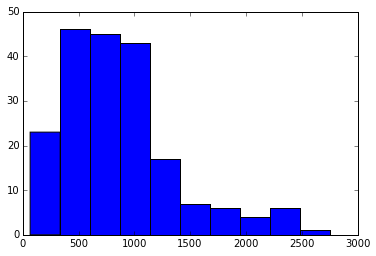

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(abstract_lens)

In [8]:
pd.DataFrame(abstract_lens).describe()

,0
count,198.000000
mean,858.030303
std,509.741916
min,66.000000
25%,506.250000
50%,759.000000
75%,1056.750000
max,2757.000000


### What about word corpus from different years

In [9]:
import nltk
stop = nltk.corpus.stopwords.words('english')

text = {}
words = {}

In [10]:
stop_list = ["ll", "II", "ll", "http", "://", "e", "g", "2", "0"]

for conference in conf_data:
    raw = " ".join(conf_data[conference]['abstracts'])
    tokens = nltk.WordPunctTokenizer().tokenize(raw)
    text[conference] = nltk.Text(tokens)
    words[conference] = [w.lower() for w in text[conference] if w.lower() not in stop_list]
    words[conference] = [w for w in words[conference] if w not in stop]
    words[conference] = filter(lambda word: word not in u'%,-:()$\/;?.’–“”*\'[]', words[conference])
    words[conference] = [w for w in words[conference] if w not in stop_list]

### Let's check collocations in the abstracts. <br >Collocations are expressions of multiple words which commonly co-occur. 

In [11]:
for conference in text:
    print conference
    print text[conference].collocations()
    print 
    

sv2014
http ://; nearest neighbor; machine learning; Reference Model;
neighbor algorithm; IPython Notebook; big data; open source; make
predictions; data analysis; Big Data; github repository; current
state; means clustering; visualization libraries; https ://; compiler
optimizations; accepting payments; block fraud; concise construction
None

ldn2014
http ://; machine learning; :// www; data processing; open source;
Matrix Factorisation; certain types; public clouds; rent ratios;
financial industry; PyData Boston; blocking technique; cloud
computing; exact solution; includes two; presentation focuses; drug
development; graphical plotting; quantum chemistry; wide range
None

berlin2014
http ://; machine learning; Big Data; Quantified Self; self tracking;
Semantic Web; Coming Soon; among others; open source; data analysis;
case study; Hadoop jobs; :// www; working knowledge; predictive model;
time permits; Add tranformations; Machine Learning; Operating System;
Pythonista interested
Non

### Words used in abstracts

In [12]:
numwords = {}
uniwords = {}

for conference in text:
    numwords[conference] = len(text[conference])
    uniwords[conference] = len(set(text[conference]))

for conference in reversed(conferences):
    print "%s: \tnumwords - %i, unique - %i" % \
        (conference, numwords[conference], uniwords[conference])

nyc2013: 	numwords - 4329, unique - 1337
ldn2014: 	numwords - 5860, unique - 1738
sv2014: 	numwords - 7462, unique - 1906
berlin2014: 	numwords - 7633, unique - 1877
nyc2014: 	numwords - 6293, unique - 1824


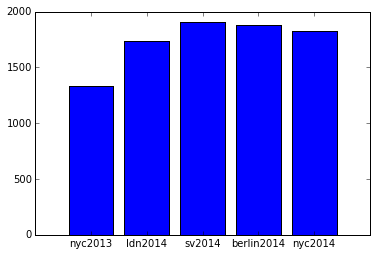

In [13]:
plt.bar(range(len(uniwords)), [uniwords[conference] for conference in reversed(conferences)], align='center', )
plt.xticks(range(len(uniwords)), [conference for conference in reversed(conferences)])

plt.show()

### Seems like the number of unique words had its peak during the sv2014 and right now is pretty stable and even slowly decreasing


# Bigrams

In [14]:
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()

for conference in reversed(conferences):
    print "Bigrams " + str(conference)
    finder = BigramCollocationFinder.from_words(words[conference])
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    print pd.DataFrame(scored[:25])
    print "\n\n"

Bigrams nyc2013
                              0         1
0           (machine, learning)  0.008158
1               (scikit, learn)  0.005152
2                (coming, soon)  0.003435
3              (data, analysis)  0.002147
4                (chip, design)  0.001717
5               (data, science)  0.001717
6             (image, features)  0.001717
7           (ipython, notebook)  0.001717
8                (open, source)  0.001717
9                   (scidb, py)  0.001717
10           (data, scientists)  0.001288
11       (learning, algorithms)  0.001288
12            (learning, tasks)  0.001288
13               (models, like)  0.001288
14               (python, data)  0.001288
15               (talk, covers)  0.001288
16       (across, organization)  0.000859
17    (analytics, capabilities)  0.000859
18               (array, based)  0.000859
19            (array, oriented)  0.000859
20            (asynchronous, o)  0.000859
21  (asynchronous, programming)  0.000859
22               (

# Year over Year

In [15]:
result = pd.DataFrame()

for conference in reversed(conferences):
    finder = BigramCollocationFinder.from_words(words[conference], window_size = 2)
    ignored_words = nltk.corpus.stopwords.words('english')
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    scores = finder.score_ngrams(bigram_measures.raw_freq)
    
    if len(result) == 0:
        result = pd.DataFrame(scores, columns=["ngram", str(conference)])
    else:
        result = result.merge(pd.DataFrame(scores, columns=["ngram", str(conference)]))
        
print result[:15]

                  ngram   nyc2013   ldn2014    sv2014  berlin2014   nyc2014
0   (machine, learning)  0.008158  0.001969  0.002550    0.002329  0.004188
1       (scikit, learn)  0.005152  0.001312  0.002295    0.001294  0.003290
2      (data, analysis)  0.002147  0.000656  0.001530    0.002070  0.000897
3       (data, science)  0.001717  0.001312  0.001530    0.001035  0.003290
4   (ipython, notebook)  0.001717  0.000984  0.002040    0.001294  0.000598
5        (open, source)  0.001717  0.001312  0.002295    0.001294  0.002692
6        (python, data)  0.001288  0.000328  0.000765    0.000259  0.000299
7     (user, interface)  0.000859  0.000328  0.000765    0.000259  0.000299
8           (big, data)  0.000429  0.000656  0.002805    0.001811  0.001496
9        (data, driven)  0.000429  0.000656  0.000510    0.001035  0.000598
10   (data, processing)  0.000429  0.001969  0.001020    0.001811  0.001197
11         (data, sets)  0.000429  0.000656  0.000765    0.000259  0.001197
12         (

In [16]:
transposed = result[:10].transpose()
headers = transposed[0:1:].values
print headers

[[(u'machine', u'learning') (u'scikit', u'learn') (u'data', u'analysis')
  (u'data', u'science') (u'ipython', u'notebook') (u'open', u'source')
  (u'python', u'data') (u'user', u'interface') (u'big', u'data')
  (u'data', u'driven')]]


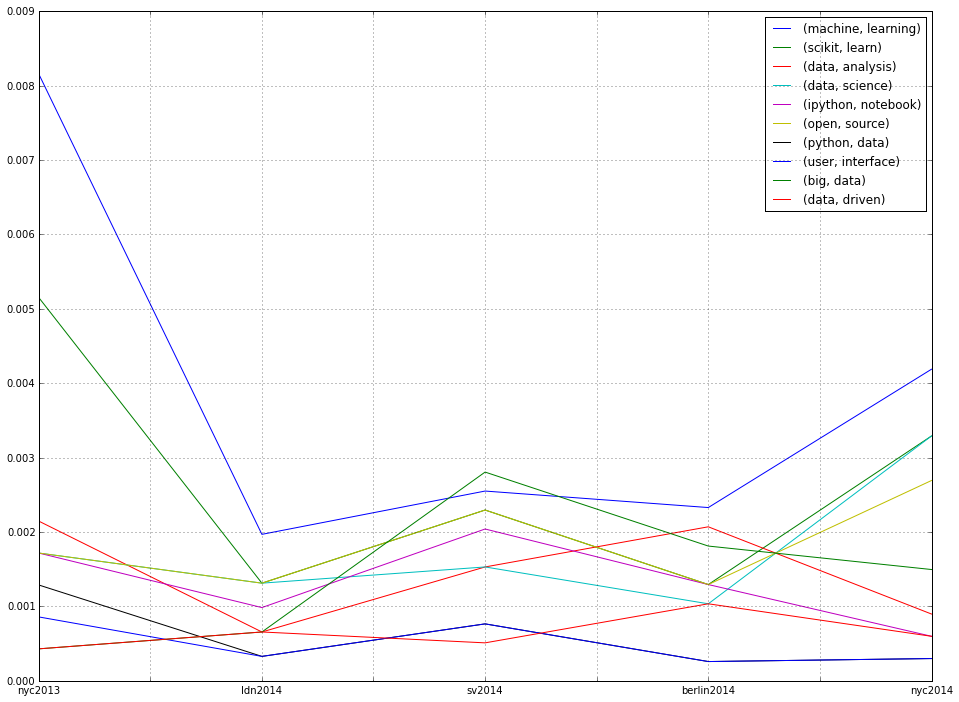

In [17]:
%matplotlib inline

new_transposed = transposed[1::]
new_transposed.columns = headers[0]
new_transposed.plot(figsize=(16,12))

In [18]:
print result[:15].sort(['nyc2014'], ascending=[0])

                  ngram   nyc2013   ldn2014    sv2014  berlin2014   nyc2014
0   (machine, learning)  0.008158  0.001969  0.002550    0.002329  0.004188
1       (scikit, learn)  0.005152  0.001312  0.002295    0.001294  0.003290
3       (data, science)  0.001717  0.001312  0.001530    0.001035  0.003290
5        (open, source)  0.001717  0.001312  0.002295    0.001294  0.002692
8           (big, data)  0.000429  0.000656  0.002805    0.001811  0.001496
10   (data, processing)  0.000429  0.001969  0.001020    0.001811  0.001197
11         (data, sets)  0.000429  0.000656  0.000765    0.000259  0.001197
2      (data, analysis)  0.002147  0.000656  0.001530    0.002070  0.000897
4   (ipython, notebook)  0.001717  0.000984  0.002040    0.001294  0.000598
9        (data, driven)  0.000429  0.000656  0.000510    0.001035  0.000598
13  (high, performance)  0.000429  0.000984  0.001785    0.000259  0.000598
6        (python, data)  0.001288  0.000328  0.000765    0.000259  0.000299
7     (user,

## We have very few data points, but based on data we can see, that *(machine, learning)* and *(scikit, learn)* is still on top. *(open, source)* and *(big, data)* is also picking up, that means, that we already have some experience and starting to play bigger.